Nama: Samuel Marcellino Setiawan
<br>NIM : 202000202

In [1]:
import os
import glob
from pandas import read_csv
# from numpy import nan, array
# from sklearn.impute import KNNImputer

def load_dataset():
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path, "*.csv"))

    df = read_csv('januari.csv')

    for i in range(len(csv_files)):
        if not csv_files[i] == "januari.csv":
            df2 = read_csv(csv_files[i])
            df = df.append(df2)
            
    df.drop('pencapaian_Waktu_tempuh', axis=1, inplace=True)
    df.dropna(inplace=True)
    return df

In [2]:
def seperate_input_output(dataframe):
    input_variables = [col for col in df.columns if col != 'pencapaian_kecepatan']
    X = df[input_variables].values
    y = df['pencapaian_kecepatan'].values
    
    return X, y

In [3]:
df = load_dataset()
X, y = seperate_input_output(df)

print(df.shape)
print(X.shape, y.shape)

(984, 9)
(984, 8) (984,)


## 1. Hitunglah akurasi model regresi linear (gunakan cross validation) tanpa menggunakan scaling maupun encoder

Karena belum memakai encoding, fitur dengan nilai non-numerik akan di drop terlebih dahulu

In [4]:
df = load_dataset()
print(df.shape)

(984, 9)


In [5]:
df.drop(['waktu', 'arah', 'koridor'], axis=1, inplace=True)
print(df.shape)

(984, 6)


In [6]:
X, y = seperate_input_output(df)
print(X.shape, y.shape)

(984, 5) (984,)


In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean, absolute, std

# define which cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# define model
model = LinearRegression()
# use k-fold cross validation to evaluate
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
print(f'MAE: {absolute(mean(scores))} ({std(scores)})')

MAE: 2.02013583821258 (0.15195026335566902)


## 2. Buatlah histogram untuk tiga cara: (normalisasi, standarisasi, dan robust scaler) untuk fitur numerik, lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk tiga cara ini (dengan memakai fitur numerik saja)

In [8]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from numpy import mean, absolute, std

def scale_and_evaluate(scaler, model, X, y):
    X_trans = scaler.fit_transform(X)
    pipeline = Pipeline(steps=[('t', scaler), ('m', model)])
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)

    fig = DataFrame(X_trans).hist(xlabelsize=5, ylabelsize=5)
    [x.title.set_size(5) for x in fig.ravel()]

    pyplot.show()
    print(f'MAE: {absolute(mean(n_scores))} ({std(n_scores)})')

### a. Normalisasi

In [9]:
df = load_dataset()
df.drop(['waktu', 'arah', 'koridor'], axis=1, inplace=True)
X, y = seperacte_input_output(df)
print(X.shape, y.shape)

(984, 5) (984,)


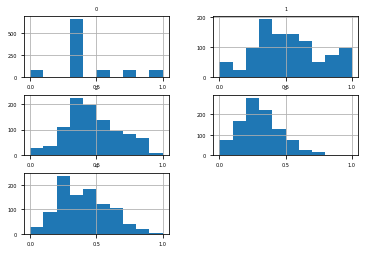

MAE: 2.0201358382125796 (0.15195026335567022)


In [10]:
scale_and_evaluate(MinMaxScaler(), LinearRegression(), X, y)

### b. Standarisasi

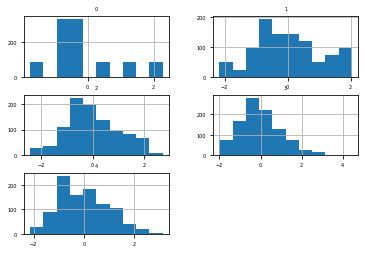

MAE: 2.0201358382125796 (0.15195026335566988)


In [11]:
scale_and_evaluate(StandardScaler(), LinearRegression(), X, y)

### c. Robust Scaler

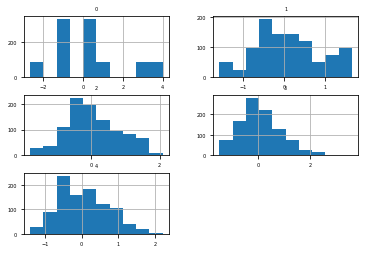

MAE: 2.0201358382125796 (0.15195026335566983)


In [12]:
scale_and_evaluate(RobustScaler(), LinearRegression(), X, y)

## 3. Gunakan onehot encoder dan ordinal encoder terhadap dataset untuk fitur kategorial. Lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk dua cara ini (dengan memakai fitur kategorial saja)

In [13]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean, absolute, std

def encode_and_evaluate(encoder, model, X, y):
    X_trans = encoder.fit_transform(X)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    n_scores = cross_val_score(model, X_trans, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
    return absolute(mean(n_scores)), std(n_scores)

In [14]:
df = load_dataset()
df.drop(['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh'], axis=1, inplace=True)
print(df.shape)

X, y = seperate_input_output(df)
print(X.shape, y.shape)

(984, 4)
(984, 3) (984,)


### a. One Hot Encoder

In [15]:
mae, std_dev = encode_and_evaluate(OneHotEncoder(sparse=False), LinearRegression(), X, y)
print(f'MAE: {mae} ({std_dev})')

MAE: 3.0976750667951842 (0.20587549493818347)


### b. Ordinal Encoder

In [16]:
mae, std_dev = encode_and_evaluate(OrdinalEncoder(), LinearRegression(), X, y)
print(f'MAE: {mae} ({std_dev})')

MAE: 3.3334216106757504 (0.2739522494215703)


## 5. Gunakan kombinasi transformasi data apapun (lebih dari 2) untuk semua fitur. Lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk cara ini (dengan memakai semua fitur yang sudah tertransformasi)

In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean, absolute, std
from pandas import concat

In [18]:
def encode_scale_evaluate(encoder, scaler):
    df = load_dataset()
    y = df['pencapaian_kecepatan'].values
    X_cat = df[['waktu', 'arah', 'koridor']].values
    X_numeric = df[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']].values
    X_cat_trans = DataFrame(encoder.fit_transform(X_cat))
    X_numeric_trans = DataFrame(scaler.fit_transform(X_numeric))
    df2 = concat([X_numeric_trans, X_cat_trans], axis=1, ignore_index=True)
    X_complete_trans = df2.values
    model = LinearRegression()
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    n_scores = cross_val_score(model, X_complete_trans, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
    print(f'MAE: {absolute(mean(n_scores))} ({std(n_scores)})')

### a. Normalisasi & One Hot Encoding

In [19]:
encode_scale_evaluate(OneHotEncoder(sparse=False), MinMaxScaler())

MAE: 1.3383242372706659 (0.1334354430077412)


### b. Normalisasi & OrdinalEncoder

In [20]:
encode_scale_evaluate(OrdinalEncoder(), MinMaxScaler())

MAE: 1.9493690786966595 (0.1673803655669694)


### c. Standarisasi & One Hot Encoding

In [21]:
encode_scale_evaluate(OneHotEncoder(sparse=False), StandardScaler())

MAE: 1.3358506343529362 (0.12906116438043036)


### d. Standarisasi & OrdinalEncoder

In [22]:
encode_scale_evaluate(OrdinalEncoder(), StandardScaler())

MAE: 1.9493690786966602 (0.16738036556696995)


### e. RobustScaler & One Hot Encoding

In [23]:
encode_scale_evaluate(OneHotEncoder(sparse=False), RobustScaler())

MAE: 1.3340612962573761 (0.13002955838235514)


### f. RobustScaler & OrdinalEncoder

In [24]:
encode_scale_evaluate(OrdinalEncoder(), RobustScaler())

MAE: 1.9493690786966607 (0.16738036556697017)


## 6. Bandingkan akurasi setiap skenario (dengan metrik MAE)

 <table>
      <tr>
        <th>Encoding</th>
        <th>Scaling</th>
        <th>MAE</th>
      </tr>
      <tr>
        <td>OneHotEncoder</td>
        <td>MinMaxScaler</td>
        <td>1.3383242372706659</td>
      </tr>
      <tr>
        <td>OrdinalEncoder</td>
        <td>MinMaxScaler</td>
        <td>1.9493690786966595</td>
      </tr>
      <tr>
        <td>OneHotEncoder</td>
        <td>StandardScaler</td>
        <td>1.3358506343529362</td>
      </tr>
      <tr>
        <td>OrdinalEncoder</td>
        <td>StandardScaler</td>
        <td>1.9493690786966602</td>
      </tr>
      <tr>
        <td>OneHotEncoder</td>
        <td>RobustScaler</td>
        <td>1.3340612962573761</td>
      </tr>
      <tr>
        <td>OrdinalEncoder</td>
        <td>RobustScaler</td>
        <td>1.9493690786966607</td>
      </tr>
    </table>